In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
publicart = gpd.read_file('../data/Metro Arts Public Artwork_20240413.geojson')
print(publicart.crs)
publicart.head()
#type(publicart)

EPSG:4326


,first_name,location,project_status,latitude,description,medium,longitude,last_name,page_link,artwork,geometry
0,Seth,Shelby Street Pedestrian Bridge,Complete,36.164314,None,tube steel,-86.76936,Conley,https://www.metroartsnashville.com/fullscreen-...,The Riders,POINT (-86.76936 36.16431)
1,Ric,Richard H. Fulton Complex,Complete,36.153346,None,powder coated steel,-86.768642,Howse,https://www.metroartsnashville.com/fullscreen-...,Banjo,POINT (-86.76864 36.15335)
2,Katherine,Metro Office Building,Complete,36.153121,This body of work focuses on transitions in th...,mixed media on panel,-86.768797,Krebs,https://www.metroartsnashville.com/fullscreen-...,Divine Channel,POINT (-86.76880 36.15312)
3,Wayne,21st Ave. and Broadway,Complete,36.148329,None,"powder coated stainless steel, stainless steel...",-86.799705,Henderson,https://www.metroartsnashville.com/fullscreen-...,Good Eats,POINT (-86.79971 36.14833)
4,Michael J.,Historic Metro Courthouse,Complete,36.166747,"Created during a live painting exhibition, thi...",acrylic on canvas,-86.778286,McBride,https://www.metroartsnashville.com/fullscreen-...,Dancing in the Streets of Music City,POINT (-86.77829 36.16675)


In [3]:
zipcodes = gpd.read_file('../data/zipcodes.geojson')
print(zipcodes.crs)
zipcodes.head( )

EPSG:4326


,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."


<Axes: >

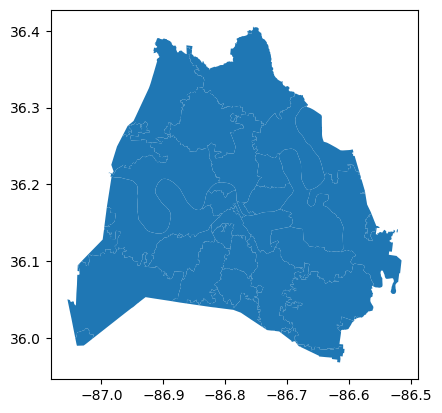

In [4]:
zipcodes.plot()

In [15]:
part_by_zip = gpd.sjoin(publicart, zipcodes, predicate = 'within')
part_by_zip.head()

,first_name,location,project_status,latitude,description,medium,longitude,last_name,page_link,artwork,geometry,index_right,zip,objectid,po_name,shape_stlength,shape_starea
0,Seth,Shelby Street Pedestrian Bridge,Complete,36.164314,None,tube steel,-86.76936,Conley,https://www.metroartsnashville.com/fullscreen-...,The Riders,POINT (-86.76936 36.16431),31,37213,4,NASHVILLE,30678.541831175633,23392261.943359375
1,Ric,Richard H. Fulton Complex,Complete,36.153346,None,powder coated steel,-86.768642,Howse,https://www.metroartsnashville.com/fullscreen-...,Banjo,POINT (-86.76864 36.15335),47,37210,12,NASHVILLE,93234.882954078275,265638803.54284668
2,Katherine,Metro Office Building,Complete,36.153121,This body of work focuses on transitions in th...,mixed media on panel,-86.768797,Krebs,https://www.metroartsnashville.com/fullscreen-...,Divine Channel,POINT (-86.76880 36.15312),47,37210,12,NASHVILLE,93234.882954078275,265638803.54284668
3,Wayne,21st Ave. and Broadway,Complete,36.148329,None,"powder coated stainless steel, stainless steel...",-86.799705,Henderson,https://www.metroartsnashville.com/fullscreen-...,Good Eats,POINT (-86.79971 36.14833),39,37240,36,NASHVILLE,7052.8091646713856,2841889.5506591797
4,Michael J.,Historic Metro Courthouse,Complete,36.166747,"Created during a live painting exhibition, thi...",acrylic on canvas,-86.778286,McBride,https://www.metroartsnashville.com/fullscreen-...,Dancing in the Streets of Music City,POINT (-86.77829 36.16675),36,37201,14,NASHVILLE,25670.555742711778,11151362.94934082


In [6]:
part_by_zip['zip'].value_counts

<bound method IndexOpsMixin.value_counts of 0      37213
1      37210
2      37210
3      37240
4      37201
       ...  
172    37201
173    37201
174    37201
175    37115
176    37206
Name: zip, Length: 174, dtype: object>

In [13]:
art_37203 = part_by_zip[part_by_zip['zip']==37203]
art_37203.shape

(0, 17)

In [10]:
polygon37203 = zipcodes.loc[zipcodes['zip'] == '37203']
polygon37203.shape

(1, 6)

ValueError: aspect must be finite and positive 

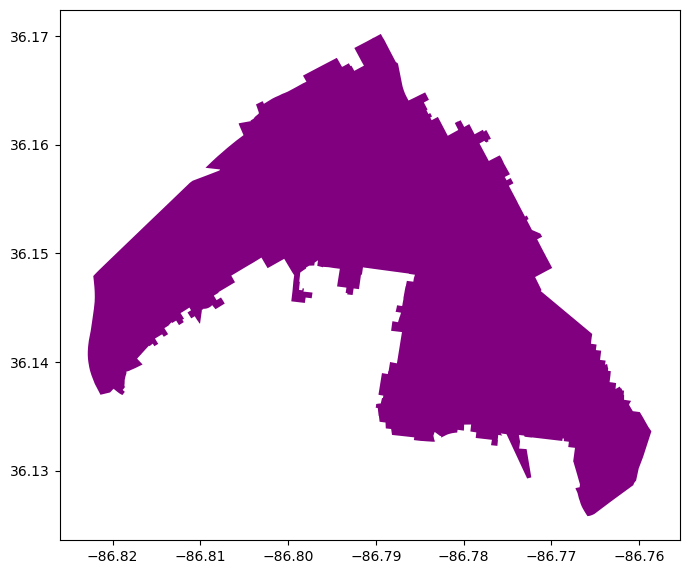

In [17]:
ax = polygon37203.plot(figsize = (8, 12), color = 'purple')
art_37203.plot( ax = ax, column = 'artwork');
plt.show();